In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD
from numpy import *
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
plt.style.use(['science','notebook','grid'])
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [3]:
vals = load(r"C:\Users\Nunocastanheira\Desktop\boooks\research\Gelb!\Code\test\12 2\Master.npy") #Load npy array.

In [4]:
energy = torch.tensor(vals[0,40,:,0],dtype=torch.float) #Energies. This is the same array for all spectra, so use any spectra's x-axis.
thickness = torch.tensor(linspace(1,41,401)[0:400],dtype=torch.float) #Thicknesses!
train = torch.tensor(vals[0,:,:,1],dtype=torch.float)*10**7 #All y-axes for spectra. You can normalize this, but here I just multiplied by 10^7
print(shape(energy))
print(shape(train))
print(shape(thickness))
print(energy)


torch.Size([2048])
torch.Size([400, 2048])
torch.Size([400])
tensor([ 500.0000,  500.4880,  500.9770,  ..., 1498.5400, 1499.0200,
        1499.5100])


In [22]:
def train_model(x,y,f, n_epochs=500): #Model training. Consult PyTorch docs for inputs/out.
    opt = SGD(f.parameters(), lr=10**-4) #Perform stochastic gradient descent.
    L = nn.MSELoss() #New mean-squared error loss after SGD.

    # Train model.
    losses = []
    for _ in tqdm(range(n_epochs)):
        opt.zero_grad() 
        loss_value = L(f(x), y)
        loss_value.backward() 
        opt.step() 
        losses.append(loss_value.item())
    return f, losses #Output is the trained function and the loss for each step. 

N = 2**7 #Array size. Arbitrary, but powers of 2 tend to be (negligibly) faster for most code. 

class MyNeuralNet(nn.Module): #Neural net in question.
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2048,N) #Input x is [N,2048]. Linear layers are fed to nonlinear activation layers.
        self.Matrix2 = nn.Linear(N,N) #Linear layer fed to activation layer below.
        self.Matrix3 = nn.Linear(N,N)
        self.Matrix4 = nn.Linear(N,N)
        self.Matrix5 = nn.Linear(N,1) #Output is [400,1] = [400], as thicknesses are scalar.
        #Nonlinear activations.
        self.R = nn.ReLU() 
        self.E = nn.Tanh()
        self.P = nn.Mish()
        self.T = nn.GELU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.P(self.Matrix2(x))
        x = self.E(self.Matrix3(x))
        x = self.T(self.Matrix4(x))
        x = self.Matrix5(x)
        return x.squeeze()

x = train
y = thickness
f = MyNeuralNet()

# Train model
f, losses = train_model(x,y,f, n_epochs=300000)

100%|██████████| 300000/300000 [36:51<00:00, 135.67it/s] 


In [23]:
min(losses)

0.007298542186617851

In [24]:
shape(f(x))

torch.Size([400])

In [25]:
f(x) #Predicted thicknesses.

tensor([ 1.0719,  1.1420,  1.2386,  1.3093,  1.4229,  1.5041,  1.6242,  1.6895,
         1.7818,  1.9166,  2.0172,  2.0916,  2.2091,  2.3067,  2.4460,  2.4878,
         2.5816,  2.7191,  2.8103,  2.8876,  3.0133,  3.0889,  3.2413,  3.3331,
         3.4089,  3.5235,  3.6260,  3.7351,  3.8212,  3.9261,  4.0573,  4.1285,
         4.2398,  4.3191,  4.4331,  4.4881,  4.6357,  4.7654,  4.8396,  4.9402,
         5.0415,  5.1346,  5.2048,  5.2981,  5.3834,  5.4898,  5.6045,  5.7208,
         5.8193,  5.9480,  6.0048,  6.1143,  6.1957,  6.3033,  6.4279,  6.5302,
         6.6026,  6.7117,  6.8051,  6.8996,  7.0121,  7.1012,  7.2411,  7.3148,
         7.4266,  7.5557,  7.6371,  7.7444,  7.8364,  7.9520,  8.0001,  8.1446,
         8.2285,  8.2805,  8.4270,  8.5364,  8.6316,  8.7172,  8.7998,  8.8841,
         9.0459,  9.1145,  9.2236,  9.3867,  9.3965,  9.5109,  9.6487,  9.7796,
         9.8139,  9.8708, 10.0135, 10.1378, 10.1965, 10.3401, 10.4071, 10.5248,
        10.6655, 10.7445, 10.8376, 10.93

In [26]:
thickness #Actual thicknesses.

tensor([ 1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,  1.6000,  1.7000,
         1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,  2.4000,  2.5000,
         2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,  3.2000,  3.3000,
         3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,  4.0000,  4.1000,
         4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,  4.8000,  4.9000,
         5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,  5.6000,  5.7000,
         5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,  6.4000,  6.5000,
         6.6000,  6.7000,  6.8000,  6.9000,  7.0000,  7.1000,  7.2000,  7.3000,
         7.4000,  7.5000,  7.6000,  7.7000,  7.8000,  7.9000,  8.0000,  8.1000,
         8.2000,  8.3000,  8.4000,  8.5000,  8.6000,  8.7000,  8.8000,  8.9000,
         9.0000,  9.1000,  9.2000,  9.3000,  9.4000,  9.5000,  9.6000,  9.7000,
         9.8000,  9.9000, 10.0000, 10.1000, 10.2000, 10.3000, 10.4000, 10.5000,
        10.6000, 10.7000, 10.8000, 10.90

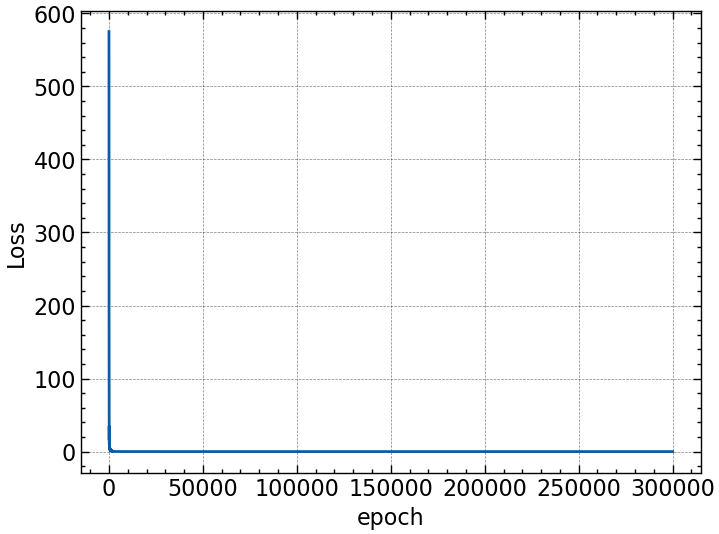

In [27]:
#Plot losses.
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

In [28]:
torch.save(f, 'Al thickness 12 2.pt') #Save model.

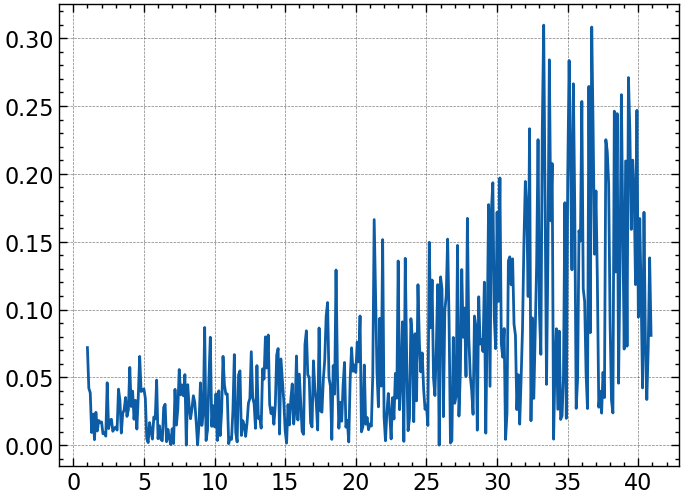

In [29]:
plt.plot(thickness.detach().numpy(), abs(thickness-f(x)).detach().numpy()) #Absolute error for each thickness.

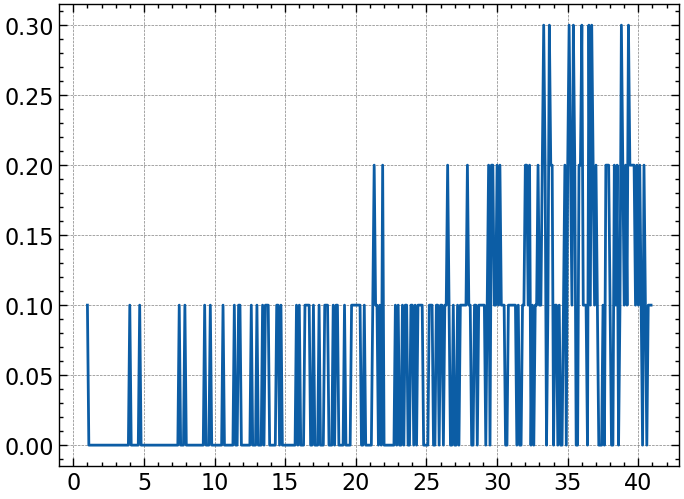

In [36]:
new = [round(a,1) for a in f(x).detach().numpy()]
plt.plot(thickness.detach().numpy(), abs(thickness.detach().numpy()-new)) #Rounded absolute error for each thickness (1 sig fig).